# 🧪 Garbage Classification with EfficientNetV2B2
This notebook loads and prepares a garbage image dataset for classification using TensorFlow.

In [3]:
# 📌 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 📦 Unzip dataset
!unzip -q "/content/drive/MyDrive/Datasets.zip" -d "/content/dataset"


In [5]:
# ✅ Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# 📁 Dataset Path & Parameters
dataset_dir = "/content/dataset/TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

In [17]:
import os
print(os.listdir(dataset_dir))


['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']


In [21]:
from tensorflow.keras.utils import image_dataset_from_directory

# Re-create dataset
train_ds = image_dataset_from_directory(
    "/content/dataset/TrashType_Image_Dataset",
    image_size=(124, 124),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

# ✅ Get class names
class_names = train_ds.class_names
print("Classes:", class_names)
print("Total Classes:", len(class_names))


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Total Classes: 6


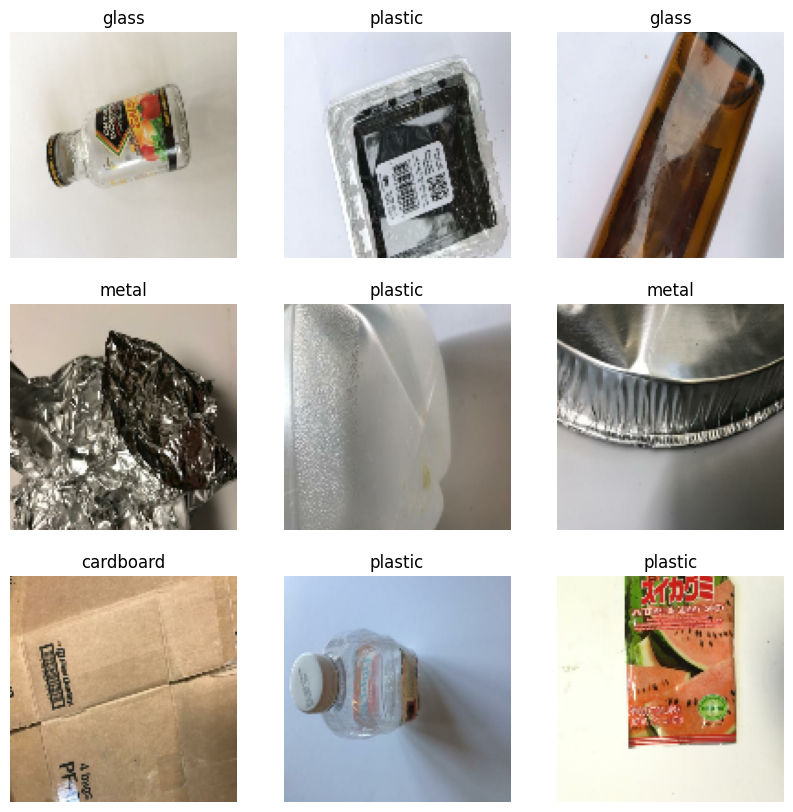

In [22]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

# Plot 9 sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [23]:
# ⚙️ Split Validation into val + test
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_dat = val_ds.skip(val_batches // 2)

# ⚡ Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dat = val_dat.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
False


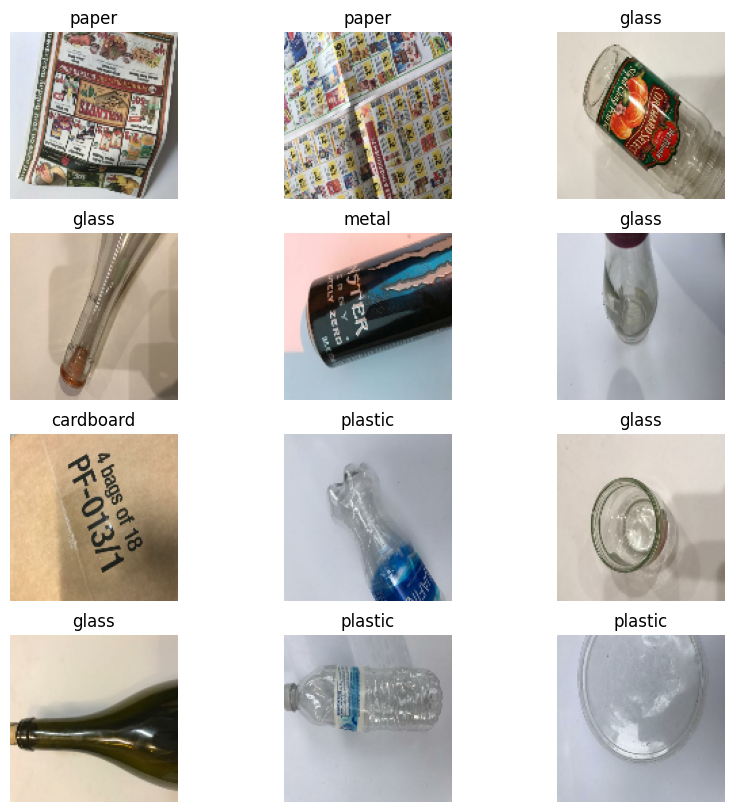

In [28]:
# 🖼️ Visualize Sample Images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

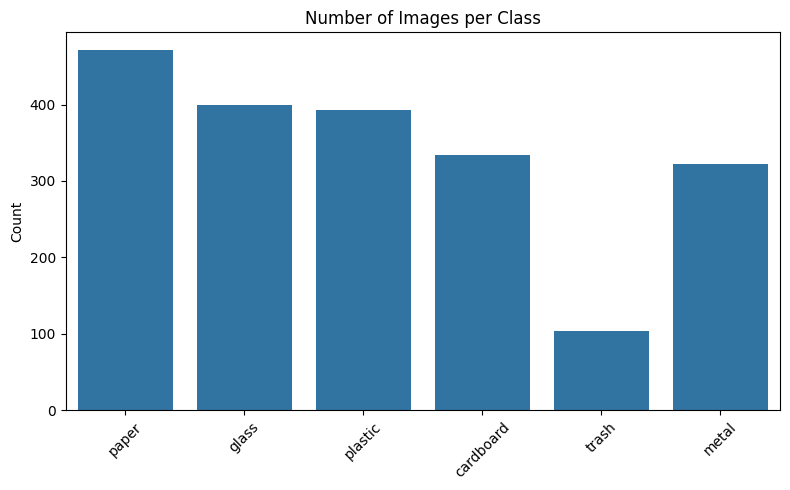

In [29]:
# 📊 Count Images Per Class
import collections
class_counts = collections.Counter()
for _, labels in train_ds.unbatch():
    class_counts[class_names[labels.numpy()]] += 1

plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()